In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



37/37 [==============================] - 2s 15ms/step
Mean Squared Error (MSE): 1438.7457251235476
Root Mean Squared Error (RMSE): 37.93080179911239
Mean Absolute Error (MAE): 28.34921866807172
R-squared (R2): 0.993281584497241


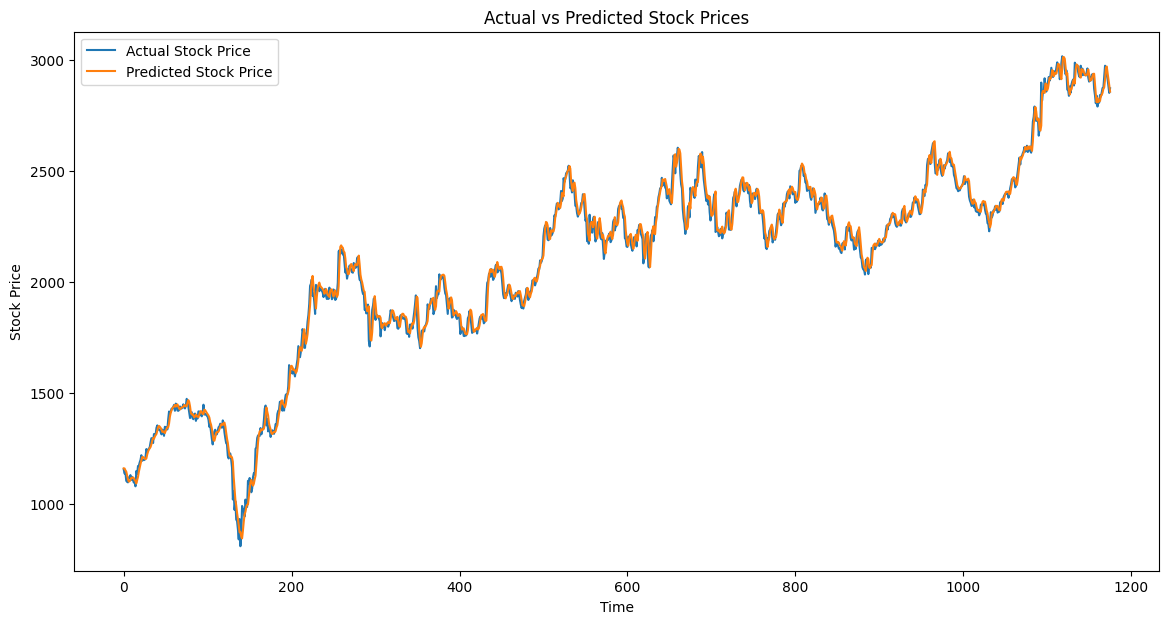

In [3]:
# Load the saved model
model = load_model('lstm_model_shuryansh.h5')

# Assuming you have your test data prepared
# Example data preparation (replace with your actual data preparation steps)
data = pd.read_csv('RELIANCE.NS.csv')  # Load your test data

# Assuming your data has a 'Close' column and the same preprocessing steps are required
feature_col = 'Close'
look_back = 60

# Scale the data using the same scaler used during training
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[[feature_col]])

# Prepare the test data for LSTM
def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

X_test, y_test = prepare_data(data_scaled, look_back)

# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)

# Inverse transform predictions and actual values using the scaler
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predictions)
r2 = r2_score(actual, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Stock Price')
plt.plot(predictions, label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
